In [1]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import torch

# Core Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Operating System Interaction
import os
import sys

# Machine Learning Frameworks
import torch
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader

# Data Transformation and Augmentation (not all of these transformations were finally used)
from torchvision.transforms import Compose, RandomHorizontalFlip, RandomRotation, \
    RandomVerticalFlip, ColorJitter, RandomAffine, RandomPerspective, RandomResizedCrop, \
    GaussianBlur, RandomAutocontrast
from torchvision.transforms import functional as F

# Model Building and Initialization
import torch.nn as nn
from torch.nn.init import kaiming_normal_

# Data Loading and Dataset Handling
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split, Subset
from PIL import Image
import json

# Cross-Validation and Metrics
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, roc_curve, auc, accuracy_score, confusion_matrix
from scipy.special import expit as sigmoid

# Visualization and Display
from matplotlib.animation import FuncAnimation
from matplotlib.colors import Normalize
from IPython.display import HTML
from astropy.visualization import ImageNormalize, SqrtStretch
import seaborn as sns
import sunpy.visualization.colormaps as cm

# Miscellaneous
import random
from tqdm import tqdm

In [41]:
db_jet=pd.read_csv("./data/Jet_clusters_3.0_2.0_paperID.csv")
db_jet

#sjh_ID                        date  \
0    sjh_2011-01-20T09_1  2011-01-20T09:15:44.000000   
1    sjh_2011-01-20T23_1  2011-01-20T23:49:20.000000   
2    sjh_2011-01-20T23_2  2011-01-20T23:54:32.000000   
3    sjh_2011-01-21T04_1  2011-01-21T04:14:32.000000   
4    sjh_2011-01-21T06_1  2011-01-21T06:48:56.000000   
..                   ...                         ...   
878  sjh_2016-11-28T23_1  2016-11-28T23:31:18.000000   
879  sjh_2016-12-01T06_1  2016-12-01T06:15:42.000000   
880  sjh_2016-12-14T18_1  2016-12-14T18:21:18.000000   
881  sjh_2016-12-24T14_1  2016-12-24T14:29:42.000000   
882  sjh_2016-12-24T14_2  2016-12-24T14:29:42.000000   

                          SOL_event   duration   basepoint_X      std_X  \
0    SOL2011-01-20T09:00:09L289C165       43.6   -226.577125   7.456468   
1    SOL2011-01-20T22:00:09L353C074       10.8   -143.625000   1.125000   
2    SOL2011-01-20T22:00:09L353C074        5.6   -142.500000   0.000000   
3    SOL2011-01-20T22:00:09L353C074        9.2   -100.466000   0.000000   
4    SOL2011-01-20T22:00:09L353C074        5.6    -11.371400   0.000000   
..                              ...        ...           ...        ...   
878  SOL2016-11-28T23:15:34L282C007       21.4     90.741233  13.444358   
879  SOL2016-12-01T06:00:06L078C065       26.4   -925.214000   3.371743   
880  SOL2016-12-14T18:16:06L031C014       10.8    139.922000   1.121000   
881  SOL2016-12-24T14:29:34L217C003       10.4     -0.883805   0.170815   
882  SOL2016-12-24T14:29:34L217C003        5.6    -28.945600   0.000000   

      basepoint_Y      std_Y   basepoint_X_longitude   basepoint_Y_latitude  \
0     -956.964375   9.576814                  -109.0                  -75.0   
1      386.404000   2.856000                    -8.0                   18.0   
2      389.260000   0.000000                    -8.0                   18.0   
3      387.028000   0.000000                    -6.0                   18.0   
4      475.010000   0.000000                    -0.0                   23.0   
..            ...        ...                     ...                    ...   
878    992.448333  10.397446                   100.0                   84.0   
879    334.932400   4.124857                   -90.0                   19.0   
880    946.276000   0.290000                    34.0                   75.0   
881    988.594000   2.634000                    -1.0                   87.0   
882    982.297000   0.000000                   -36.0                   87.0   

      max_height    upper_H    lower_H   avg_width   std_width   velocity  \
0     173.811389  46.785032 -36.862662   52.282512   14.552284   0.139272   
1      97.731917  16.548028 -14.151831   83.204500   10.121327        NaN   
2      75.814019  49.693522 -30.017843   40.384010    0.000000        NaN   
3      84.057521  30.622882 -22.445714   79.405020    0.000000        NaN   
4     129.894627  38.593654 -29.753454   73.469787    0.000000        NaN   
..           ...        ...        ...         ...         ...        ...   
878    74.231647  28.677197 -20.685837   41.422292   16.527980   0.079307   
879   182.893574  76.771017 -54.073317   56.740563    4.853882   0.293099   
880    37.325099  14.085658 -10.226432   27.281073    3.442009        NaN   
881    72.070191  15.427879 -12.707597   27.402313    4.503471   0.250244   
882    38.278101   4.101062  -3.704199   15.276940    0.000000        NaN   

        sigma   flag  
0    0.417661      1  
1    0.337046     10  
2    0.635112    110  
3    0.462752     10  
4    0.405649    110  
..        ...    ...  
878  0.459268      1  
879  0.465372      0  
880  0.516663     10  
881  0.386284      0  
882  0.184177    110  

[883 rows x 18 columns]

In [46]:
width=db_jet[" avg_width"]/3
height=db_jet[" max_height"]/3

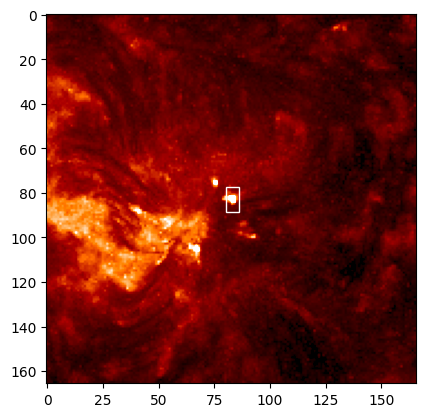

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle
from matplotlib.pyplot import cm
from IPython.display import HTML

file_number=842
archive = np.load(f"./data/data separated/data1/{file_number}.npz")
array = archive["arr_0"]

# Create a figure and axis
fig, ax = plt.subplots()

# Initialize the animation with an empty frame
vmin, vmax = np.percentile(array, [1, 99.9])
norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=SqrtStretch())
im = plt.imshow(np.zeros(array.shape[:2]), cmap='sdoaia304', norm=norm)


# Define the rectangle parameters
rect_params = {
    'xy': (166/2-width[file_number]/2,166/2-height[file_number]/2),  # x and y coordinate of the lower left corner
    'width': width[file_number],  # width of the rectangle
    'height': height[file_number],  # height of the rectangle
    'linewidth': 1,  # line width of the rectangle
    'edgecolor': 'w',  # edge color of the rectangle 
    'facecolor': 'none'  # no filling color for the rectangle
}

# Create the rectangle
rect = Rectangle(**rect_params)

# Add the rectangle to the axis
ax.add_patch(rect)

# Function to update the animation frame
def update(frame):
    im.set_data(array[:, :, frame])
    return im,

# Create the animation
ani = FuncAnimation(fig, update, frames=30, interval=100)  # 100 milliseconds per frame

# Display the animation as a clickable animation in the notebook
HTML(ani.to_jshtml())
#print(width[file_number], height[file_number], 166/2)

Create dataset

In [97]:
dataset_box=pd.read_csv("./data/Jet_clusters_3.0_2.0_paperID.csv", usecols=["#sjh_ID", " max_height", " avg_width"])
dataset_box=dataset_box.rename(columns={"#sjh_ID":"id",
                    " max_height": "height", 
                    " avg_width": "width"})
dataset_box["height"]=dataset_box["height"]/3
dataset_box["width"]=dataset_box["width"]/3
dataset_box


id     height      width
0    sjh_2011-01-20T09_1  57.937130  17.427504
1    sjh_2011-01-20T23_1  32.577306  27.734833
2    sjh_2011-01-20T23_2  25.271340  13.461337
3    sjh_2011-01-21T04_1  28.019174  26.468340
4    sjh_2011-01-21T06_1  43.298209  24.489929
..                   ...        ...        ...
878  sjh_2016-11-28T23_1  24.743882  13.807431
879  sjh_2016-12-01T06_1  60.964525  18.913521
880  sjh_2016-12-14T18_1  12.441700   9.093691
881  sjh_2016-12-24T14_1  24.023397   9.134104
882  sjh_2016-12-24T14_2  12.759367   5.092313

[883 rows x 3 columns]

Left click to define the first point of the rectangle, right click to define the second point.


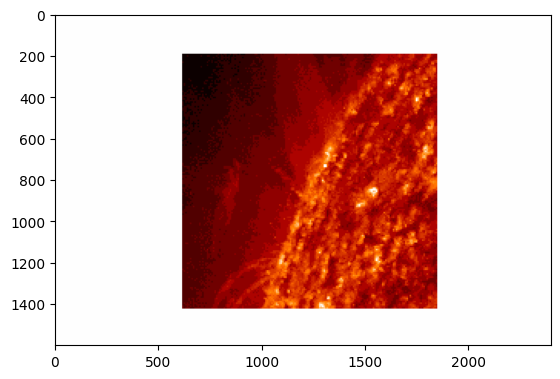

In [98]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.image import imread

class RectangleDrawer:
    def __init__(self, image_path):
        self.image = imread(image_path)
        self.fig, self.ax = plt.subplots()
        self.ax.imshow(self.image)
        self.rect = None
        self.cid = self.fig.canvas.mpl_connect('button_press_event', self.onclick)

    def onclick(self, event):
        if event.dblclick:
            return

        if event.button == 1:
            if self.rect:
                self.rect.remove()
            self.start_point = (event.xdata, event.ydata)
        elif event.button == 3:
            self.end_point = (event.xdata, event.ydata)
            self.draw_rectangle()

    def draw_rectangle(self):
        x = min(self.start_point[0], self.end_point[0])
        y = min(self.start_point[1], self.end_point[1])
        width = abs(self.start_point[0] - self.end_point[0])
        height = abs(self.start_point[1] - self.end_point[1])
        self.rect = Rectangle((x, y), width, height, linewidth=2, edgecolor='r', facecolor='none')
        self.ax.add_patch(self.rect)
        self.fig.canvas.draw()

    def show(self):
        plt.show()

if __name__ == "__main__":
    image_path = "animation.gif"  # Replace "your_image.jpg" with the path to your image
    drawer = RectangleDrawer(image_path)
    print("Left click to define the first point of the rectangle, right click to define the second point.")
    drawer.show()
